In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.0,random_state=101)

In [4]:
X,y = data

In [5]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [6]:
feat = pd.DataFrame(X)

In [7]:
feat = pd.concat([feat,z_noise],axis=1)

In [8]:
feat.columns = ['X1','X2','X3']

In [9]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


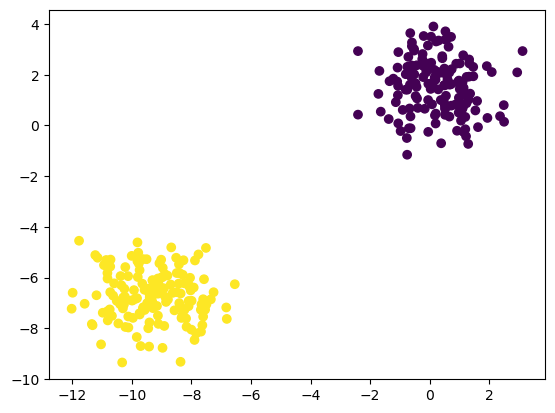

In [10]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# %matplotlib notebook

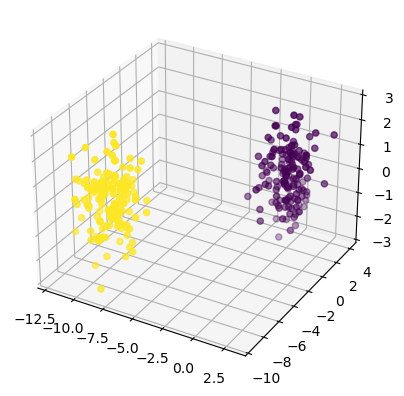

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
from tensorflow.keras.optimizers import SGD

In [16]:
import tensorflow as tf

In [17]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
encoder = Sequential()

encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [19]:
decoder = Sequential()

decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [20]:
autoencoder = Sequential([encoder,decoder])

In [21]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=1.5))

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(feat)

In [24]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 2ms/step - loss: 0.1727
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1296
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1278
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1287


In [25]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 995us/step


In [26]:
encoded_2dim.shape

(300, 2)

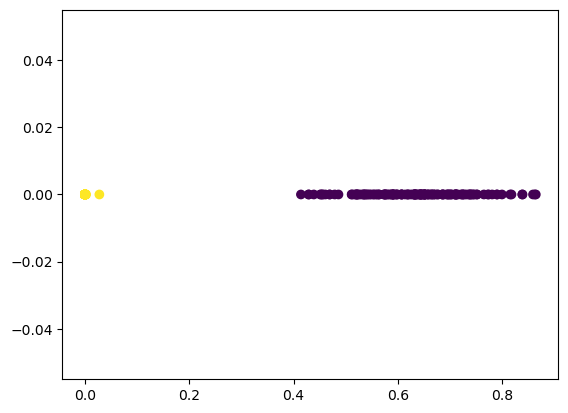

In [27]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)